## Lectura Missouri

Lectura de los archivos de reviews de Missouri

In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Missouri. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/6.json', lines= True)
df_7 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/7.json', lines= True)
df_8 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/8.json', lines= True)
df_9 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/9.json', lines= True)
df_10 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/10.json', lines= True)
df_11 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Missouri/11.json', lines= True)


C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 12):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Missouri = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros

reviews_Missouri.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089882e+20,Tracy Reeder,1575932557871,1,This company seems like a great place to work ...,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b
1,1.004776e+20,Brett Stevens,1554489896899,5,None,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b
2,1.181701e+20,steven williams,1498137347552,5,None,None,None,0x87c87e473635feb5:0x6de42f63fb4ad19b


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Missouri.shape

(1650000, 8)

In [6]:
# Miro el tipo de información

reviews_Missouri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650000 entries, 0 to 1649999
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1650000 non-null  float64
 1   name     1650000 non-null  object 
 2   time     1650000 non-null  int64  
 3   rating   1650000 non-null  int64  
 4   text     952732 non-null   object 
 5   pics     39723 non-null    object 
 6   resp     230759 non-null   object 
 7   gmap_id  1650000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 100.7+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls = pd.DataFrame(reviews_Missouri.isnull().sum().sort_values(ascending = False))
nulls["Porcentaje de nulos"] = round(nulls/reviews_Missouri.shape[0]*100,2)
nulls.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,1610277,97.59
resp,1419241,86.01
text,697268,42.26
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_Missouri.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [9]:
reviews_Missouri.user_id.nunique()

251135

En el estado de Missouri, tenemos 251135 usuarios que emitieron 1.65 M de reseñas.

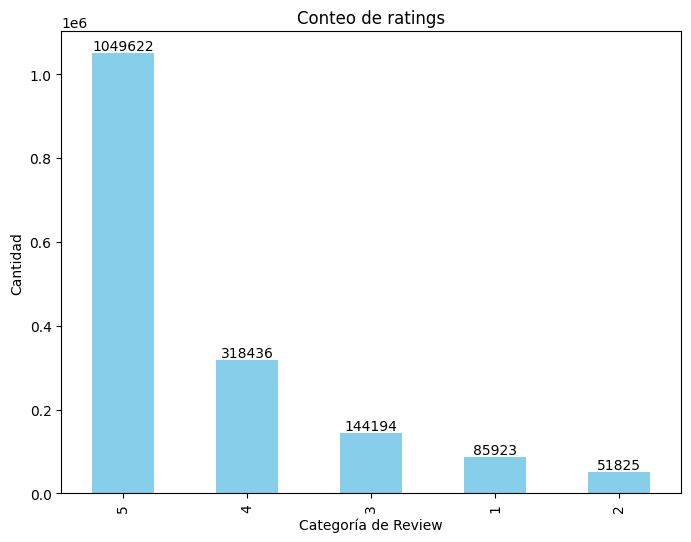

In [10]:
rating = reviews_Missouri.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [11]:
reviews_Missouri['time'] = pd.to_datetime(reviews_Missouri['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [12]:
reviews_Missouri['time'] = pd.to_datetime(reviews_Missouri['time'], format='%d/%m/%Y')

reviews_Missouri['year'] = reviews_Missouri['time'].dt.year

In [13]:
min_date = reviews_Missouri.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2006-05-14 00:00:00
2006-05-14 00:00:00


In [14]:
max_date = reviews_Missouri.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-08 00:00:00
2021-09-08 00:00:00


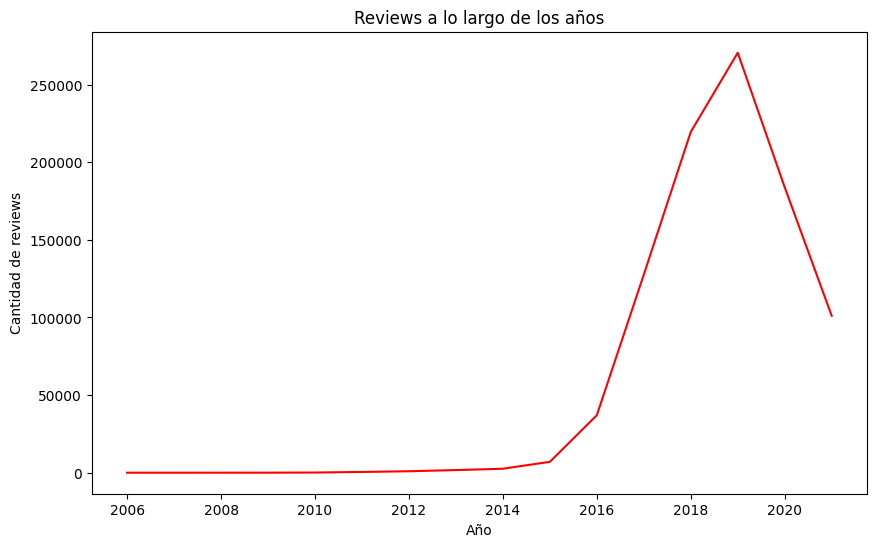

In [15]:
conteo_por_año= reviews_Missouri[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [16]:
reviews_Missouri["text"] = reviews_Missouri["text"].astype(str)
reviews_Missouri.dropna(subset=["text"], inplace=True)

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


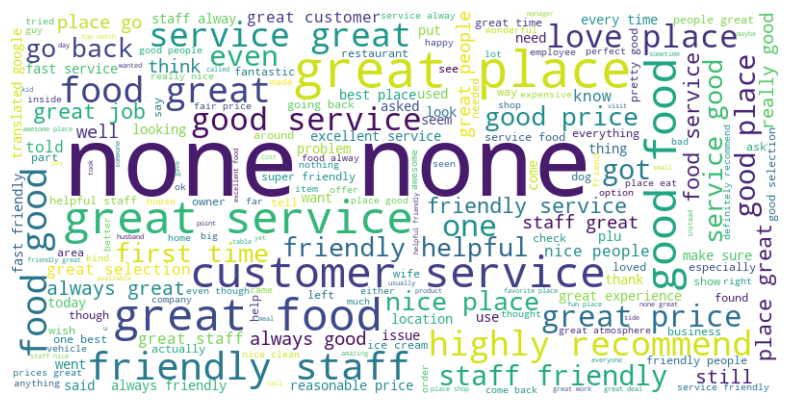

In [18]:
texto = " ".join(reviews_Missouri["text"])

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

texto_procesado = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
